<a href="https://colab.research.google.com/github/PriyanshiMehta650/CODSOFT/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IRIS FLOWER CLASSIFICATION**

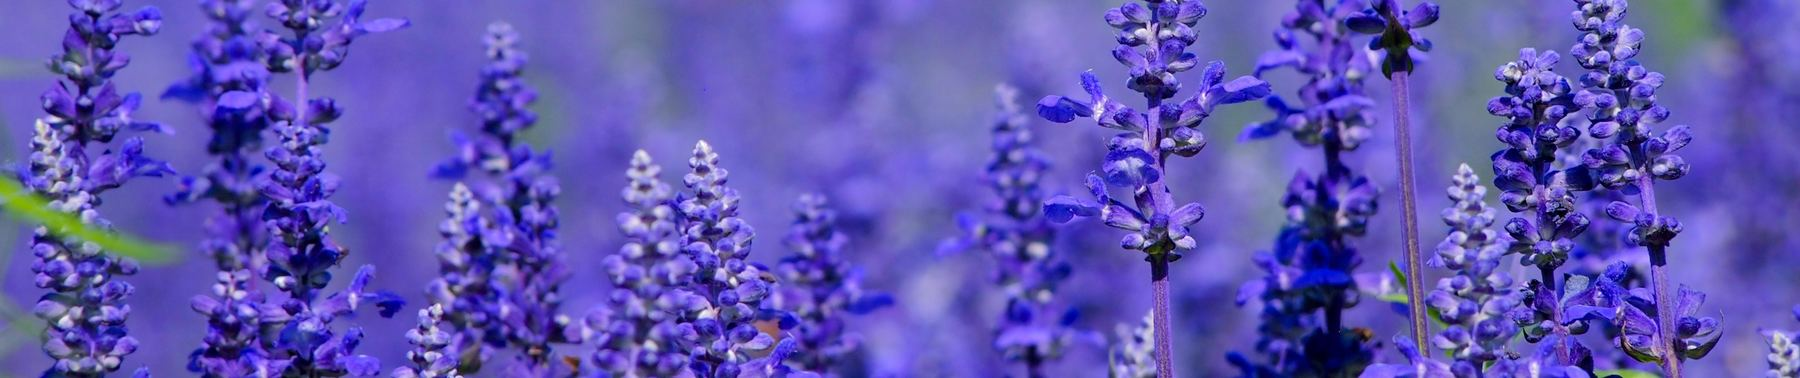

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [ ]:
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

**Data Visualization**

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)',
                    color='species', title='3D Scatter Plot of Iris Data')
fig.show()

In [ ]:
sns.pairplot(df, hue='species')
plt.show()

In [ ]:
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 7))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Add species mapping
species_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df['species_code'] = df['species'].map(species_mapping)

# Scatter plot
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['species_code'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter plot of Sepal Length vs Sepal Width')
plt.colorbar(label='Species')
plt.show()

**Data Preprocessing**

split the data

In [ ]:
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)